### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m,'\n')

#TESTING
print('first row ',m[:1])
print('second row ',m[1:2],'\n')

# Let us make it more general
def extractrow(m, row):
    return m[row:row+1]
#print(extractrow(m,0))

def extractcolumn(m, col):
    return m[:,col]
#print(extractcolumn(m,1))

print('\n----------------------------------------------')

for i in range(m.shape[1]):
    print('colonna',i,':',extractcolumn(m,i),'--> media =',np.mean(extractcolumn(m,i)))
print('----------------------------------------------')   
for i in range(m.shape[0]):
    print('riga',i,':',extractrow(m,i),'--> media =',np.mean(extractrow(m,i)))
print('----------------------------------------------') 
print('The mean of all values: ',np.mean(m))
#print(np.mean(m),'=',(np.mean(extractrow(m,0))+np.mean(extractrow(m,1))+np.mean(extractrow(m,2)))/3)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

first row  [[0 1 2 3]]
second row  [[4 5 6 7]] 


----------------------------------------------
colonna 0 : [0 4 8] --> media = 4.0
colonna 1 : [1 5 9] --> media = 5.0
colonna 2 : [ 2  6 10] --> media = 6.0
colonna 3 : [ 3  7 11] --> media = 7.0
----------------------------------------------
riga 0 : [[0 1 2 3]] --> media = 1.5
riga 1 : [[4 5 6 7]] --> media = 5.5
riga 2 : [[ 8  9 10 11]] --> media = 9.5
----------------------------------------------
The mean of all values:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [58]:
#Using the function outer in numpy
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

np.outer(u, v, out=None)

array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]])

In [70]:
lena = len(a)
lenb = len(b)

c = np.zeros((len(u), len(v)))
print(c,'\n')

for i in range(lena):
    for k in range(lenb):
        c[i,k]=u[i]*v[k]

        
print(outerproduct(u,v))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]


In [86]:
d = np.zeros((len(u), len(v)))
print(d,'\n')

w=v.reshape(len(v),1)
print(w*u)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [137]:
import numpy.random as npr
npr.seed(123)

g = npr.rand(10,6)

print(g,'\n')

# The idea is to create for each row a boolean array that has element True, if a element of that row is < 0.1, 
# so that by using np.any on the boolean array, if it returns True that means that there's an element < 0.1
for row in range(g.shape[1]):
    boolmatrix = (g[row:row+1]<[0.1,0.1,0.1,0.1,0.1,0.1])
    if ( np.any(boolmatrix) == True ):
        g[row:row+1] = 0

print(g)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]] 

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [143]:
h = np.linspace(0, 2*np.pi)
h

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [144]:
print(h[::10])

[0.         1.28228272 2.56456543 3.84684815 5.12913086]


In [145]:

print(h[::-1])

[6.28318531 6.15495704 6.02672876 5.89850049 5.77027222 5.64204395
 5.51381568 5.38558741 5.25735913 5.12913086 5.00090259 4.87267432
 4.74444605 4.61621778 4.48798951 4.35976123 4.23153296 4.10330469
 3.97507642 3.84684815 3.71861988 3.5903916  3.46216333 3.33393506
 3.20570679 3.07747852 2.94925025 2.82102197 2.6927937  2.56456543
 2.43633716 2.30810889 2.17988062 2.05165235 1.92342407 1.7951958
 1.66696753 1.53873926 1.41051099 1.28228272 1.15405444 1.02582617
 0.8975979  0.76936963 0.64114136 0.51291309 0.38468481 0.25645654
 0.12822827 0.        ]


In [154]:
mask = (np.power(np.sin(h)-np.cos(h),2)<0.01)
h = h[mask]
print(h,np.pi/4,np.pi/4+np.pi)

[0.76936963 3.97507642] 0.7853981633974483 3.9269908169872414


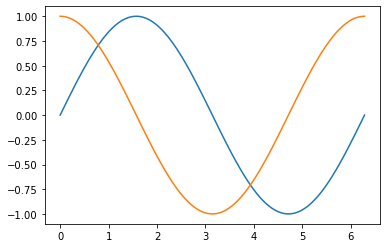

In [87]:
import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline 
# tell jupyter to plot inline

xs = np.linspace(0, 2*np.pi, 100)
ysin = np.sin(xs)
ycos = np.cos(xs)
plt.plot(xs, ysin);
plt.plot(xs, ycos);

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [167]:
a = (np.arange(10)+1)
b = a.reshape(10,1)

c = a*b
c

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [168]:
traccia = c.trace()
traccia

385

In [173]:
d = np.flip(c,1)
e = np.diag(d)
e

array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])

In [178]:
f = np.roll(c,-1)
g = np.diag(f)
g

array([ 2,  6, 12, 20, 30, 42, 56, 72, 90,  1])

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [194]:
distances = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
distances = np.array(distances)

distancesT = distances.reshape(10,1)

grid = np.absolute(distances-distancesT)
grid = 0.62*grid
grid

array([[0.0, 122.8, 187.9, 456.3, 540.0, 728.5, 914.5, 957.3, 1186.1,
        1517.8],
       [122.8, 0.0, 65.1, 333.6, 417.3, 605.7, 791.7, 834.5, 1063.3,
        1395.0],
       [187.9, 65.1, 0.0, 268.5, 352.2, 540.6, 726.6, 769.4, 998.2,
        1329.9],
       [456.3, 333.6, 268.5, 0.0, 83.7, 272.2, 458.2, 501.0, 729.7,
        1061.4],
       [540.0, 417.3, 352.2, 83.7, 0.0, 188.5, 374.5, 417.3, 646.0,
        977.7],
       [728.5, 605.7, 540.6, 272.2, 188.5, 0.0, 186.0, 228.8, 457.6,
        789.3],
       [914.5, 791.7, 726.6, 458.2, 374.5, 186.0, 0.0, 42.8, 271.6,
        603.3],
       [957.3, 834.5, 769.4, 501.0, 417.3, 228.8, 42.8, 0.0, 228.8,
        560.5],
       [1186.1, 1063.3, 998.2, 729.7, 646.0, 457.6, 271.6, 228.8, 0.0,
        331.7],
       [1517.8, 1395.0, 1329.9, 1061.4, 977.7, 789.3, 603.3, 560.5,
        331.7, 0.0]])

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [277]:
numbers = np.arange(100)+1

mask = np.array(numbers == -1)

for i in range(2,len(numbers)+1):
    mask = np.append(mask, numbers % i == 0)

mask = mask.reshape(len(numbers),len(numbers))

secondmask = 1-np.eye(len(numbers))

thirdmask = np.logical_and(mask,secondmask)
#print(mask,'\n\n',thirdmask)

fourthmask = np.any(thirdmask,axis=0)

finalmask = np.logical_not(fourthmask)
numbers[finalmask]

# La logica dietro questo algoritmo è un po' complicata, preferirei spiegarmi in italiano:
# Il primo filtro contiene true tanti true, quante volte è stata effettuata una divisione tra numbers (1,2,3,4...)
# e il suddetto numero.
# Quindi per ogni numero primo, vi sarà un solo true, che si troverà sulla diagonale principale:
#
#    1  2  3  4  5 
#
# 1  T  F  F  F  F
#
# 2  F  T  F  T  F
#
# 3  F  F  T  F  F
#
# 4  F  F  F  T  F
#
# 5  F  F  F  F  T
#
# Si noti che 4 ad esempio contiene già due true, essendo divisibile per 2 e per se stesso.
#
# Col secondo e terzo filtro si è fatto in modo di eliminare tutti i true sulla diagonale facendo un and logico
# con una matrice (1-Id)
#
# Adesso tutti i numeri primi contengono solo false nella loro colonna, da qui si è usato any per ottenere l'ultimo
# filtro

array([ 1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
       59, 61, 67, 71, 73, 79, 83, 89, 97])

In [69]:
# TESTING OF THE ALGORITHM W/ FOR LOOP

numbers = np.arange(100)+1
primes = []

primes.append(1)
mask = ( numbers % 2 != 0)

primes.append((numbers[1]))
numbers = numbers[mask]
#print(mask,primes,numbers)


mask = ( numbers % 3 != 0)

primes.append((numbers[1]))
numbers = numbers[mask]


#print(mask,primes,numbers)


mask = ( numbers % 4 != 0)

primes.append((numbers[1]))
numbers = numbers[mask]


print(primes)

[1, 2, 3, 5]


In [78]:
#######################################################################
#############         sieve of Eratosthenes               #############
#######################################################################

numbers = np.arange(100)+1
primes = []

primes.append(1)

for i in range(2,len(numbers)-3):
    mask = ( numbers % i != 0)

    primes.append((numbers[1]))
    numbers = numbers[mask]

np.unique(primes,axis=0)

array([ 1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
       59, 61, 67, 71, 73, 79, 83, 89, 97])

# 8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

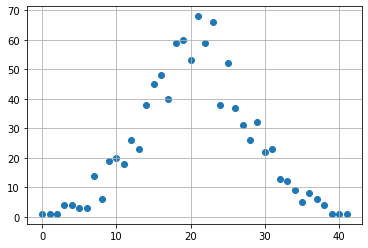

In [112]:
import random

def positive_or_negative():
    if random.random() < 0.5:
        return 1
    else:
        return -1


numwalkers = 1000
steps = 200
lenghtgrid = 200

grid = np.zeros(200)

for i in range(numwalkers):
    position = lenghtgrid//2
    for k in range(steps):
        position += positive_or_negative()
        #print(position)
    grid[position] += 1

    
# Given the fact that  the walker moves of one space (fowards or backwards) 200 times, only the odd position will
# be reached, let us remove all the 0 elements

mask = (grid != 0)
newgrid = grid[mask]

x = np.arange(0, len(newgrid), 1)
y = newgrid

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)
plt.grid()
plt.show()



In [172]:
import numpy.random as npr
def positive_or_negative():
    if random.random() < 0.5:
        return 1
    else:
        return -1


numwalkers = 1000
steps = 200
lenghtgrid = 200

gridwalker = 2*(npr.randint(0,2,size=(numwalkers,steps)))-1

gridwalker

walkersdistances = np.ndarray.sum(gridwalker,axis=1)
walkersdistances

array([ 12, -12, -12,   2,   8,   2, -10,  -2, -16, -10,   4,   4,  -6,
        10,  24,  -8,  14,  10,  16,  -8,  14,  -2,  16,   8, -18,  12,
       -12, -10, -10,  -4,   6,  18,  16,   2, -16, -24,   6,  10, -18,
        -8,   6,  28, -28,  12,  16, -16,  26,  16,   2, -10, -18,  -4,
        20,  22,  52, -18,  20,  -2,   4, -16,  12,   6, -26, -10,  -6,
        -4,  10,   4,   8, -12,  -4,  -8,  -4,   8,  24,  -6,   8,   2,
        -2,  -4,  -4, -32,  -6,  -2,   4,  -8, -24,   8, -12,  20, -16,
       -36, -16,  -8,   4,  -8,  10,  -8,  10,   4,  22,  -8,   6,  -2,
        12, -16,   6, -10,   6,  -8,  -6, -10, -10,  24, -14, -16, -14,
        12, -26,  -2,   6, -10,   6, -40,  -4,  24,  -2,  22, -18,  -4,
        10,  -4,  -4, -10,   2,  -8,  10, -28,  -8,   8,  -8,   0, -10,
        -6,  14,  -4,  -4, -14,  28,  18,   8,   8,  24,  20,  38,  10,
         8,  36,  -8,  -4, -20,  14, -12, -14,  -4,  -8,   6,  -2,  -4,
       -10,   0,  -8,  -4, -20, -10, -10, -16,  16,   2,   2,  1

[    16     80    144    144    160   2464   3040   7940   8724   8740
   8996   9140  10040  10056  11080  11276  11532  11788  11852  15216
  15280  15296  15696  16272  17428  17624  17640  18936  19192  20092
  20668  20812  20816  21012  26196  26596  26612  27908  27924  28824
  28888  29288  29432  29688  30172  30956  38700  39276  39420  39456
  39492  39816  40392  40456  44300  45456  48160  48176  49076  53700
  61444  62020  63316  63352  63496  64520  64716  64780  64796  64860
  65536  65860  66260  70356  71140  72296  75660  78160  78736  80500
  80564  81860  83016  83116  83372  84272  84756  90232  90296  90696
  95320  98920 102056 102200 102984 103048 103724 107820 109420 110576
 112176 114112 115136 116900 117684 117700 117704 123480 123580 123724
 123740 123840 123984 124560 125716 126116 132840 134776 135352 135928
 136028 136128 138628 138952 138968 139068 140364 141388 141584 144288
 144544 145028 145604 145860 146004 149368 149944 152060 152160 152644
 15304

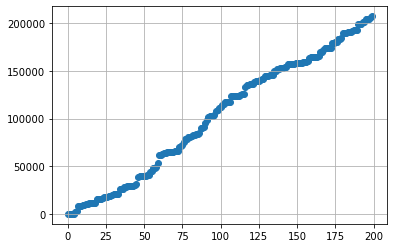

In [185]:
walkersdistances = np.ndarray.sum(gridwalker,axis=0)
walkersdistances = np.power(walkersdistances,2)
walkersdistances = np.cumsum(walkersdistances)
print(walkersdistances)


x = np.arange(0, steps, 1)
y = (walkersdistances)

fig = plt.figure()
ax = fig.gca()
plt.scatter(x, y)
plt.grid()
plt.show()

In [ ]:
# In a brownian motion <x^2> grows linear with time, with this program I found the same result

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

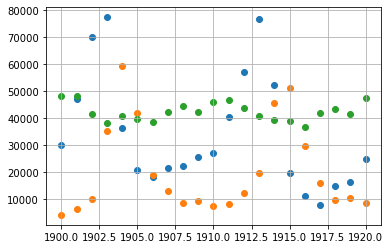

Means:
 Mean:  34080.95238095238 
 Lynx:  20166.666666666668 
 Carrot: 42400.0

St. Deviations:
 Mean:  20897.906458089667 
 Lynx:  16254.591536908763 
 Carrot: 3322.5062255844787

Correlation between hare and lynx:  [[1.         0.07189206]
 [0.07189206 1.        ]]

Correlation between hare and carrot:  [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]

Correlation between lynx and carrot:  [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]


In [238]:
file = open("populations.txt","r")
data = np.loadtxt(file,skiprows=1)

years = data[:,0] # array of years

hare = data[:,1] # array of hare
lynx = data[:,2] # array of lynx
carrot = data[:,3] # array of carrot

fig = plt.figure()
ax = fig.gca()
plt.scatter(years, hare)
plt.scatter(years, lynx)
plt.scatter(years, carrot)
plt.grid()
plt.show()

meanhare = np.mean(hare)
meanlynx = np.mean(lynx)
meancarrot = np.mean(carrot)

print('Means:\n Mean: ',meanhare,'\n Lynx: ',meanlynx,'\n Carrot:',meancarrot)

stdevhare = np.std(hare)
stdevlynx = np.std(lynx)
stdevcarrot = np.std(carrot)

print('\nSt. Deviations:\n Mean: ',stdevhare,'\n Lynx: ',stdevlynx,'\n Carrot:',stdevcarrot)
print('\nCorrelation between hare and lynx: ',np.corrcoef(hare,lynx))
print('\nCorrelation between hare and carrot: ',np.corrcoef(hare,carrot))
print('\nCorrelation between lynx and carrot: ',np.corrcoef(carrot,lynx))
#print(data,x)